각 layer 설명
=================

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms

In [35]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [12]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=(0.5), std=(0.5,))])

trainset = torchvision.datasets.MNIST(root='', 
                                      train=True,
                                      download=True,
                                      transform=transform)

testset = torchvision.datasets.MNIST(root='', 
                                      train=False,
                                      download=True,
                                      transform=transform)

train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(trainset, batch_size=8, shuffle=False, num_workers=2)

dataiter = iter(train_loader)
images, labels = dataiter.next()

### nn.Conv2d

   - in_channels : channel의 갯수
   - out_channels : 출력 채널의 갯수
   - kernel_size : 커널(필터) 사이즈
   - 텐서플로우, 케라스와 다르게 레이어 input인자에도 값을 집어 넣어줘야함

In [3]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [4]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

- weight 확인

In [5]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

In [6]:
weight = weight.detach()
# 기존 Tensor에서 gradient 전파가 안되는 텐서 생성

weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

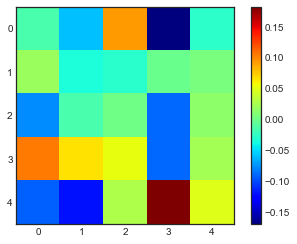

In [13]:
# weight 값 시각화
plt.imshow(weight[0, 0, :, :], 'jet')
plt.colorbar()
plt.show()

In [14]:
print(images.shape)

torch.Size([8, 1, 28, 28])


In [15]:
input_image = torch.unsqueeze(images[0], dim=0)

# layer를 통과한 input image가 output_data에 저장됨 
output_data = layer(input_image)

output = output_data.data

In [16]:
# output array를 넘파이형으로 변환
output_arr = output.numpy()
output_arr.shape

(1, 20, 24, 24)

In [17]:
# 이미지 한 장 불러오기 images[0]
torch_image = torch.squeeze(images[0])

# 넘파이 형변환
image = torch_image.numpy()

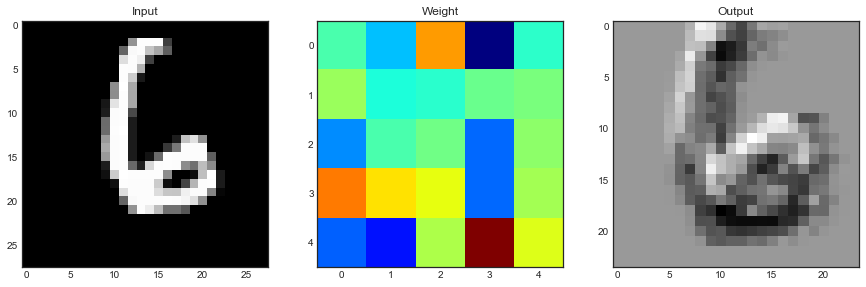

In [19]:
# layer가 weight(filter)를 통과한 과정을 시각화 

plt.figure(figsize=(15, 30))

plt.subplot(131)
plt.title('Input')
plt.imshow(image, 'gray')

plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0, 0, :, :], 'jet')

plt.subplot(133)
plt.title('Output')
plt.imshow(output_arr[0, 0, :, :], 'gray')
plt.show()

### Pooling

In [20]:
image.shape

(28, 28)

In [21]:
pool = F.max_pool2d(output, 2, 2)
pool.shape

torch.Size([1, 20, 12, 12])

   - MaxPool Layer는 weight가 없기 때문에 바로 numpy()변환 가능

In [23]:
# 넘파이 형변환
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

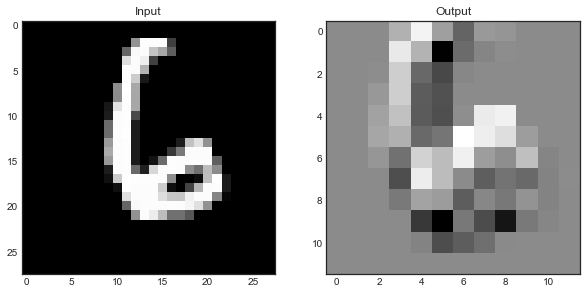

In [24]:
# pooling을 거친 layer

plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.title('Input')
plt.imshow(image, 'gray')

plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[0, 0, :, :], 'gray')
plt.show()

### Linear

   - 1d만 가능, .view()를 통해 1D로 펼쳐줘야함

In [26]:
# 넘파이에서 토치로 형변환
image = torch.from_numpy(image)
image.shape

torch.Size([28, 28])

In [27]:
# Flatten
flatten = image.view(1, 28*28)
flatten.shape

torch.Size([1, 784])

In [30]:
# output weight(filter) 만들기
lin = nn.Linear(784, 10)(flatten)
print(lin.shape, lin)

torch.Size([1, 10]) tensor([[-0.8579, -0.0203, -0.5688, -0.4404,  0.5628, -0.2023, -0.6802, -0.6300,
         -0.0483,  0.6519]], grad_fn=<AddmmBackward0>)


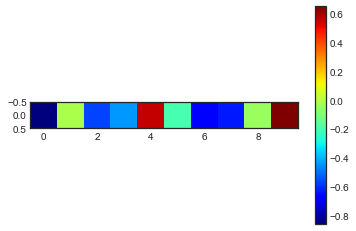

In [31]:
# linear weight 시각화
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

### Softmax

In [33]:
with torch.no_grad():
    flatten = image.view(1, 28*28)
    lin = nn.Linear(784, 10)(flatten)
    softmax = F.softmax(lin, dim=1)

In [34]:
# 각 10개의 값 중 맞을 확률을 나타냄
print(softmax)

# 따라서 10개의 값을 다 더하면 합이 1이 반환됨
print(np.sum(softmax.numpy()))

tensor([[0.0420, 0.0778, 0.0453, 0.0776, 0.4059, 0.0952, 0.0413, 0.1054, 0.0512,
         0.0583]])

### F.relu

   - nn.RELU도 사용가능

In [37]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [38]:
inputs = torch.randn(4, 3, 28, 28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [39]:
layer = nn.Conv2d(3, 20, 5, 1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])